# Исследование медицинского центра

*Выполнила Дабаева Ирина*
*25.12.2023*

#### Задача:
    Провести анализ изменения цены лечения в медицинской клинике в 2022 году относительно 2021 года.
    
#### Ссылка на датасет: 
    https://disk.yandex.ru/d/Q2o2zUlRpLwpfQ

#### Описание данных: 
    record_id - уникальный идентификатор строки данных;
    service_date - дата оказания медицинской услуги;
    service_name - наименование медицинской услуги;
    service_number - количество услуг;
    service_amount - сумма выплат (стоимость оказанных услуг в рублях);
    insured - уникальный идентификатор пациента;
    sex_id - пол пациента;
    age_for_service_date - возраст пациента.
    
**Оглавление:**

1. [Базовый анализ данных](#Базовый-анализ-данных)


2. [Предобработка данных](#Предобработка-данных)


3. [Исследовательский анализ данных](#Исследовательский-анализ-данных)
 

4. [Общий вывод](#Общий-вывод)

In [856]:
# import libraries
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import plot

pd.options.mode.chained_assignment = None

## Базовый анализ данных

In [857]:
df = pd.read_excel('data_test_task_2022.xlsx')
df.head(15)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.0,26
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2.0,26
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2.0,26
5,30268157503,2021-01-24,С-реактивный белок,420,1,490777,2.0,26
6,30268157603,2021-01-24,Взятие крови из периферической вены,158,1,490777,2.0,26
7,30268157703,2021-01-26,Прием первичный,1470,1,490777,2.0,26
8,30268157803,2021-01-26,Магнитотерапия (1 сеанс),1040,1,490777,2.0,26
9,30268157903,2021-01-26,УВЧ-терапия (1 сеанс) (1 поле),1040,1,490777,2.0,26


In [858]:
# to print basic info
def print_info():
    print(df.info(), '\n')
    print('Missing values:')
    print(df.isna().any(), '\n')
    print('Duplicates:')
    print(df[df.duplicated()])

In [859]:
print_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   record_id             85369 non-null  int64  
 1   service_date          85369 non-null  object 
 2   service_name          85369 non-null  object 
 3   service_amount        85369 non-null  int64  
 4   service_number        85369 non-null  int64  
 5   insured               85369 non-null  int64  
 6   sex_id                85348 non-null  float64
 7   age_for_service_date  85369 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 5.2+ MB
None 

Missing values:
record_id               False
service_date            False
service_name            False
service_amount          False
service_number          False
insured                 False
sex_id                   True
age_for_service_date    False
dtype: bool 

Duplicates:
Empty DataFrame
Columns: [recor

В датасете 85369 наблюдений. Кроме того, 'sex_id' единственная колонка, в которой присутствуют пропущенные значения.

In [860]:
pd.DataFrame(df.isna().mean()*100).style.background_gradient('coolwarm')

,0
record_id,0.000000
service_date,0.000000
service_name,0.000000
service_amount,0.000000
service_number,0.000000
insured,0.000000
sex_id,0.024599
age_for_service_date,0.000000


Процент пропущенных значений в колонке 'sex_id' незначительный.

In [861]:
len(df['service_name'].unique())

875

In [862]:
sorted(df['service_name'].unique())

['(1 E)Аллергопанель IgE (Молоко коровье, Молоко козье, Молоко овечье,Сыр, Творог,Сметана, Йогурт, Кефир )',
 '(2 E)Аллергопанель IgE (Пшеничная мука, Ржаная мука, Рис, Гречка, Овес, Перловка, Пшено, Ячменнная крупа )',
 '(3 E)Аллергопанель IgE (Фасоль (бобы), Горох, Чечевица (смесь), Кукуруза, Дрожжи пекарские, Белок куриного яйца, Желток куриного яйца, Яйцо перепелиное)',
 '(4 E)Аллергопанель IgE (Говядина, Телятина, Свинина, Баранина, Курица, Индейка, Утка, Гусь)',
 '(Б1 (11))Аллергопанель IgE шерсть кошки, шерсть собаки, шерсть овцы, клещ D,pteroniss, клещ D.farina, пыль домашняя, перо подушки, библиотечная пыль)',
 '17-OH - гидроксипрогестерон',
 '25-OH витамин D (25-гидроксихолекальциферол)',
 'Ascaris IgG',
 'Bordetella (pertusis) IgA',
 'Bordetella (pertusis) IgG',
 'Bordetella (pertusis) IgM',
 'Bordetella pertussis (Слюна)',
 'Bordetella pertussis (Соскоб)',
 'CMV (цитомегаловирус) (Кровь)',
 'CMV (цитомегаловирус) (Слюна)',
 'CMV (цитомегаловирус) (Соскоб)',
 'Candida albica

**Промежуточный вывод:**

- Размер: 8 x 85369;

- В колонке 'sex_id' присутствует 21 пропущенное значение;

- Всего 875 уникальных услуг в датасете;

- Явные дубликаты отсутствуют.

## Предобработка данных

Т.к. некоторые названия услуг были переименованы в 2022 году, их стоит привести к единому формату. 

In [863]:
replace_from = ['Гемостазиограмма (Коагулограмма: Антитромбин III, АЧТВ, МНО, Плазминоген, Протромбиновое время, РФМК, Тромбиновое время, Фибриноген, Активность', 
                'Исследование кала на дисбактериоз кишечника с определением чувствительности к фагам', 
                'Комплекс на операцию: (Общий анализ крови (без лейкоцитарной формулы), СОЭ, Лейкоцитарная формула, Группа крови, Rh-фактор, Келл, АЛТ', 
                'Консультация ведущего специалиста перед вакцинацией', 'Консультация педиатра перед вакцинацией', 'Обработка вульвы',
                'Перевязка гнойных ран (более 4см,кв.)', 'Перевязка гнойных ран (менее 4см,кв.)', 'Перевязка чистая (более 4 см,кв.)',  'Перевязка чистая (менее 4 см,кв.)',
                'Ультразвуковое исследование гинекология трансвагинально с ДС сосудов', 'Удаление серной пробки  (за одно ухо)',
                'Удаление серных пробок (за ухо)', 'Ударно-волновая терапия (1 сеанс)']

replace_to = ['Гемостазиограмма (Коагулограмма: Антитромбин III, АЧТВ, МНО, Плазминоген, Протромбиновое время, РФМК, Тромбиновое время, Фибриноген, Активность факторов протромбинового комплекса % по Квику)', 
              'Исследование кала на дисбактериоз кишечника с определением чувствительности к фагам и антибиотикам', 
              'Комплекс на операцию: (Общий анализ крови (без лейкоцитарной формулы), СОЭ, Лейкоцитарная формула, Группа крови, Rh-фактор, Келл, АЛТ (аланинаминотрансфераза), АСТ (аспартатаминотрансфераза), Билирубин общий, Глюкоза крови, Калий, Натрий, Креатинин, Моче',
              'Консультация врача перед вакцинацией','Консультация врача перед вакцинацией', 'Обработка вульвы лекарственными препаратами',
              'Перевязка гнойных ран (более 4 кв.см.)', 'Перевязка гнойных ран (менее 4 кв.см.)', 'Перевязка чистая (более 4 кв.см.)',  'Перевязка чистая (менее 4 кв.см.)',
              'Ультразвуковое исследование гинекология трансвагинально с ДС сосудов (доктор медицинских наук, профессор, врач-эксперт)',
              'Удаление ушной серы с одной стороны', 'Удаление ушной серы с одной стороны', 'Ударно- волновая терапия (урология, гинекология), 1 сеанс']

df['service_name'] = df['service_name'].replace(replace_from, replace_to)
df['service_name'] = df['service_name'].replace('(', '')
df['service_name'] = df['service_name'].replace(')', '')
df['service_name'] = df.service_name.replace(r'\s+', ' ', regex=True)

In [864]:
len(df['service_name'].unique())

861

Разделим услуги на следующие категории:

- МРТ/МСКТ
- лечение
- вакцинация
- хирургия
- массаж
- рентгенография
- прием/консультация
- доп. процедуры
- анализы 

Из списка уникальных услуг выше можно заметить, что основная их часть это анализы.

In [865]:
def filter(x):
    x = x.lower()
    if (('мрт' in x) | ('мскт' in x)):
        return 'МРТ/МСКТ'
    elif (('лечебно' in x) | ('лечение' in x) | ('терапия' in x) | ('обработка' in x)):
        return 'лечение'
    elif 'вакцинация' in x:
        return 'вакцинация'
    elif (('вскрытие' in x) | ('хирурги' in x) | ('удаление' in x)):
        return 'хирургия'
    elif 'массаж' in x:
        return 'массаж'
    elif 'рентгенография' in x:
        return 'рентгенография'
    elif (('прием' in x) | ('консультация' in x)):
        return 'прием/консультация'
    elif (('снятие' in x) | ('наложение' in x) | ('перевязка' in x)):
        return 'доп. процедуры'
    else: return 'анализы'
    
# divide services by categories 
df['category'] = df['service_name'].apply(filter)

In [866]:
pd.pivot_table(df, values='record_id', index='category', aggfunc='count').reset_index().sort_values(by='record_id', ascending=False)

,category,record_id
1,анализы,46246
6,прием/консультация,26327
4,лечение,6021
7,рентгенография,2486
3,доп. процедуры,1953
5,массаж,1841
8,хирургия,349
0,МРТ/МСКТ,111
2,вакцинация,35


Больше всего записей для категории 'анализы' (46246).

In [867]:
# create categories for 'age_for_service_date'
bins = [0, 2, 18, 35, 65, np.inf]
names = ['<2', '2-18', '18-35', '35-65', '65+']
df['age_group'] = pd.cut(df['age_for_service_date'], bins, labels=names)

In [868]:
# convert 'service_date' to datetime type
df['service_date'] = pd.to_datetime(df['service_date'], format='%Y-%m-%d')

# extract month and year
df['month'] = df['service_date'].dt.month
df['year'] = df['service_date'].dt.year
df.head()

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,category,age_group,month,year
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26,прием/консультация,18-35,1,2021
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26,анализы,18-35,1,2021
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.0,26,анализы,18-35,1,2021
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2.0,26,анализы,18-35,1,2021
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2.0,26,анализы,18-35,1,2021


## Исследовательский анализ данных

In [869]:
# function to create pivot tables
def create_pivot(df_, val, ind, func):
    tmp = pd.pivot_table(df_, values=val, index=ind, aggfunc=func)
    return tmp

In [870]:
# function to plot
def set_plot(mode, df_, x_, y_, x_lbl, y_lbl, ttl, hue_='', lgd_title=''):
    if mode == 0:
        sns.barplot(df_, x=x_, y=y_)
    elif mode == 1:
        sns.catplot(data=df_, x=x_, y=y_, hue=hue_, kind="bar", legend=False)
        plt.legend(title=lgd_title)
    elif mode == 3:
        sns.catplot(data=df_, x=x_, y=y_, kind="bar", legend=False)
    plt.title(ttl)
    plt.xlabel(x_lbl)
    plt.ylabel(y_lbl)
    plt.show()


    year  service_amount
0  2021        50561671
1  2022        48986662 



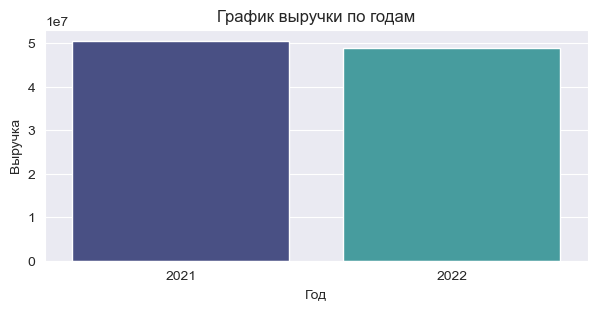

In [871]:
# set style
sns.set_style("darkgrid")    
custom_palette = sns.color_palette("mako", 2)
sns.set_palette(custom_palette)

# calculate revenue for each year
revenue_by_year = create_pivot(df, 'service_amount', 'year', 'sum')
revenue_by_year = revenue_by_year.reset_index().sort_values(by='service_amount', ascending=False)
print('\n',revenue_by_year,'\n')

# plot revenue for each year
plt.figure(figsize=(7, 3))
set_plot(0, revenue_by_year, "year", "service_amount", 'Год', 'Выручка', 'График выручки по годам')

Выручка примерно на одном уровне для 2021 и 2022 гг.

In [872]:
# calculate total revenue for each month in 2021 and 2022
revenue_by_month = create_pivot(df, 'service_amount', ['year', 'month'], 'sum').reset_index()

In [873]:
# calculate revenue % for each month of 2021 and % diff comapred to previous month
revenue_by_month_2021 = revenue_by_month.query('year==2021')
revenue_by_month_2021['fraction'] = revenue_by_month_2021['service_amount']*100/sum(revenue_by_month_2021['service_amount'])
revenue_by_month_2021['pct_change'] = revenue_by_month_2021['service_amount'].pct_change(periods=1) * 100
print(revenue_by_month_2021, '\n')

# same as above for 2022
revenue_by_month_2022 = revenue_by_month.query('year==2022')
revenue_by_month_2022['fraction'] = revenue_by_month_2022['service_amount']*100/sum(revenue_by_month_2022['service_amount'])
revenue_by_month_2022['pct_change'] = revenue_by_month_2022['service_amount'].pct_change(periods=1) * 100
print(revenue_by_month_2022)

    year  month  service_amount   fraction  pct_change
0   2021      1         2265931   4.481519         NaN
1   2021      2         2379125   4.705392    4.995474
2   2021      3         3927248   7.767243   65.071108
3   2021      4         4380487   8.663652   11.540881
4   2021      5         4298978   8.502444   -1.860729
5   2021      6         4522585   8.944691    5.201399
6   2021      7         3872209   7.658388  -14.380625
7   2021      8         4310989   8.526200   11.331516
8   2021      9         4782859   9.459456   10.945748
9   2021     10         6063580  11.992444   26.777310
10  2021     11         4747330   9.389187  -21.707473
11  2021     12         5010350   9.909384    5.540377 

    year  month  service_amount   fraction  pct_change
12  2022      1         4800320   9.799239         NaN
13  2022      2         5298235  10.815669   10.372538
14  2022      3         6451060  13.169013   21.758661
15  2022      4         8035080  16.402587   24.554414
16  2022

В 2021 году:

- Октябрь был самым плодотворным месяцем (почти 12% от всей выручки за год);
- Сразу же после этого идет спад. Доход в ноябре снизился почти на 22% по сравнению с октябрем;
- В марте можно заметить резкое увеличение прибыли на 65% по сравнению с февралем.

В 2022 году:

- В датасете присутствуют данные только до августа;
- До апреля прибыль росла, а после сразу начала падать;
- В августе произошло резкое уеньшение выручки по сравнению с июлем (на 40%).

In [874]:
# difference in revenue between 2021 and 2022
merged_revenue= pd.DataFrame()
merged_revenue['month'] = revenue_by_month_2021['month']
merged_revenue['amount_2021'] = revenue_by_month_2021['service_amount']
merged_revenue = pd.merge(merged_revenue, revenue_by_month_2022[['service_amount', 'month']], on='month', how='outer')
merged_revenue = merged_revenue.rename(columns={'service_amount':'amount_2022'})
merged_revenue['diff'] = merged_revenue['amount_2022'] / merged_revenue['amount_2021']

merged_revenue

,month,amount_2021,amount_2022,diff
0,1,2265931,4800320.0,2.118476
1,2,2379125,5298235.0,2.226968
2,3,3927248,6451060.0,1.642641
3,4,4380487,8035080.0,1.834289
4,5,4298978,7588110.0,1.765096
5,6,4522585,6879580.0,1.521161
6,7,3872209,6216498.0,1.605414
7,8,4310989,3717779.0,0.862396
8,9,4782859,NaN,NaN
9,10,6063580,NaN,NaN


In [875]:
pal = sns.color_palette("mako", len(merged_revenue))

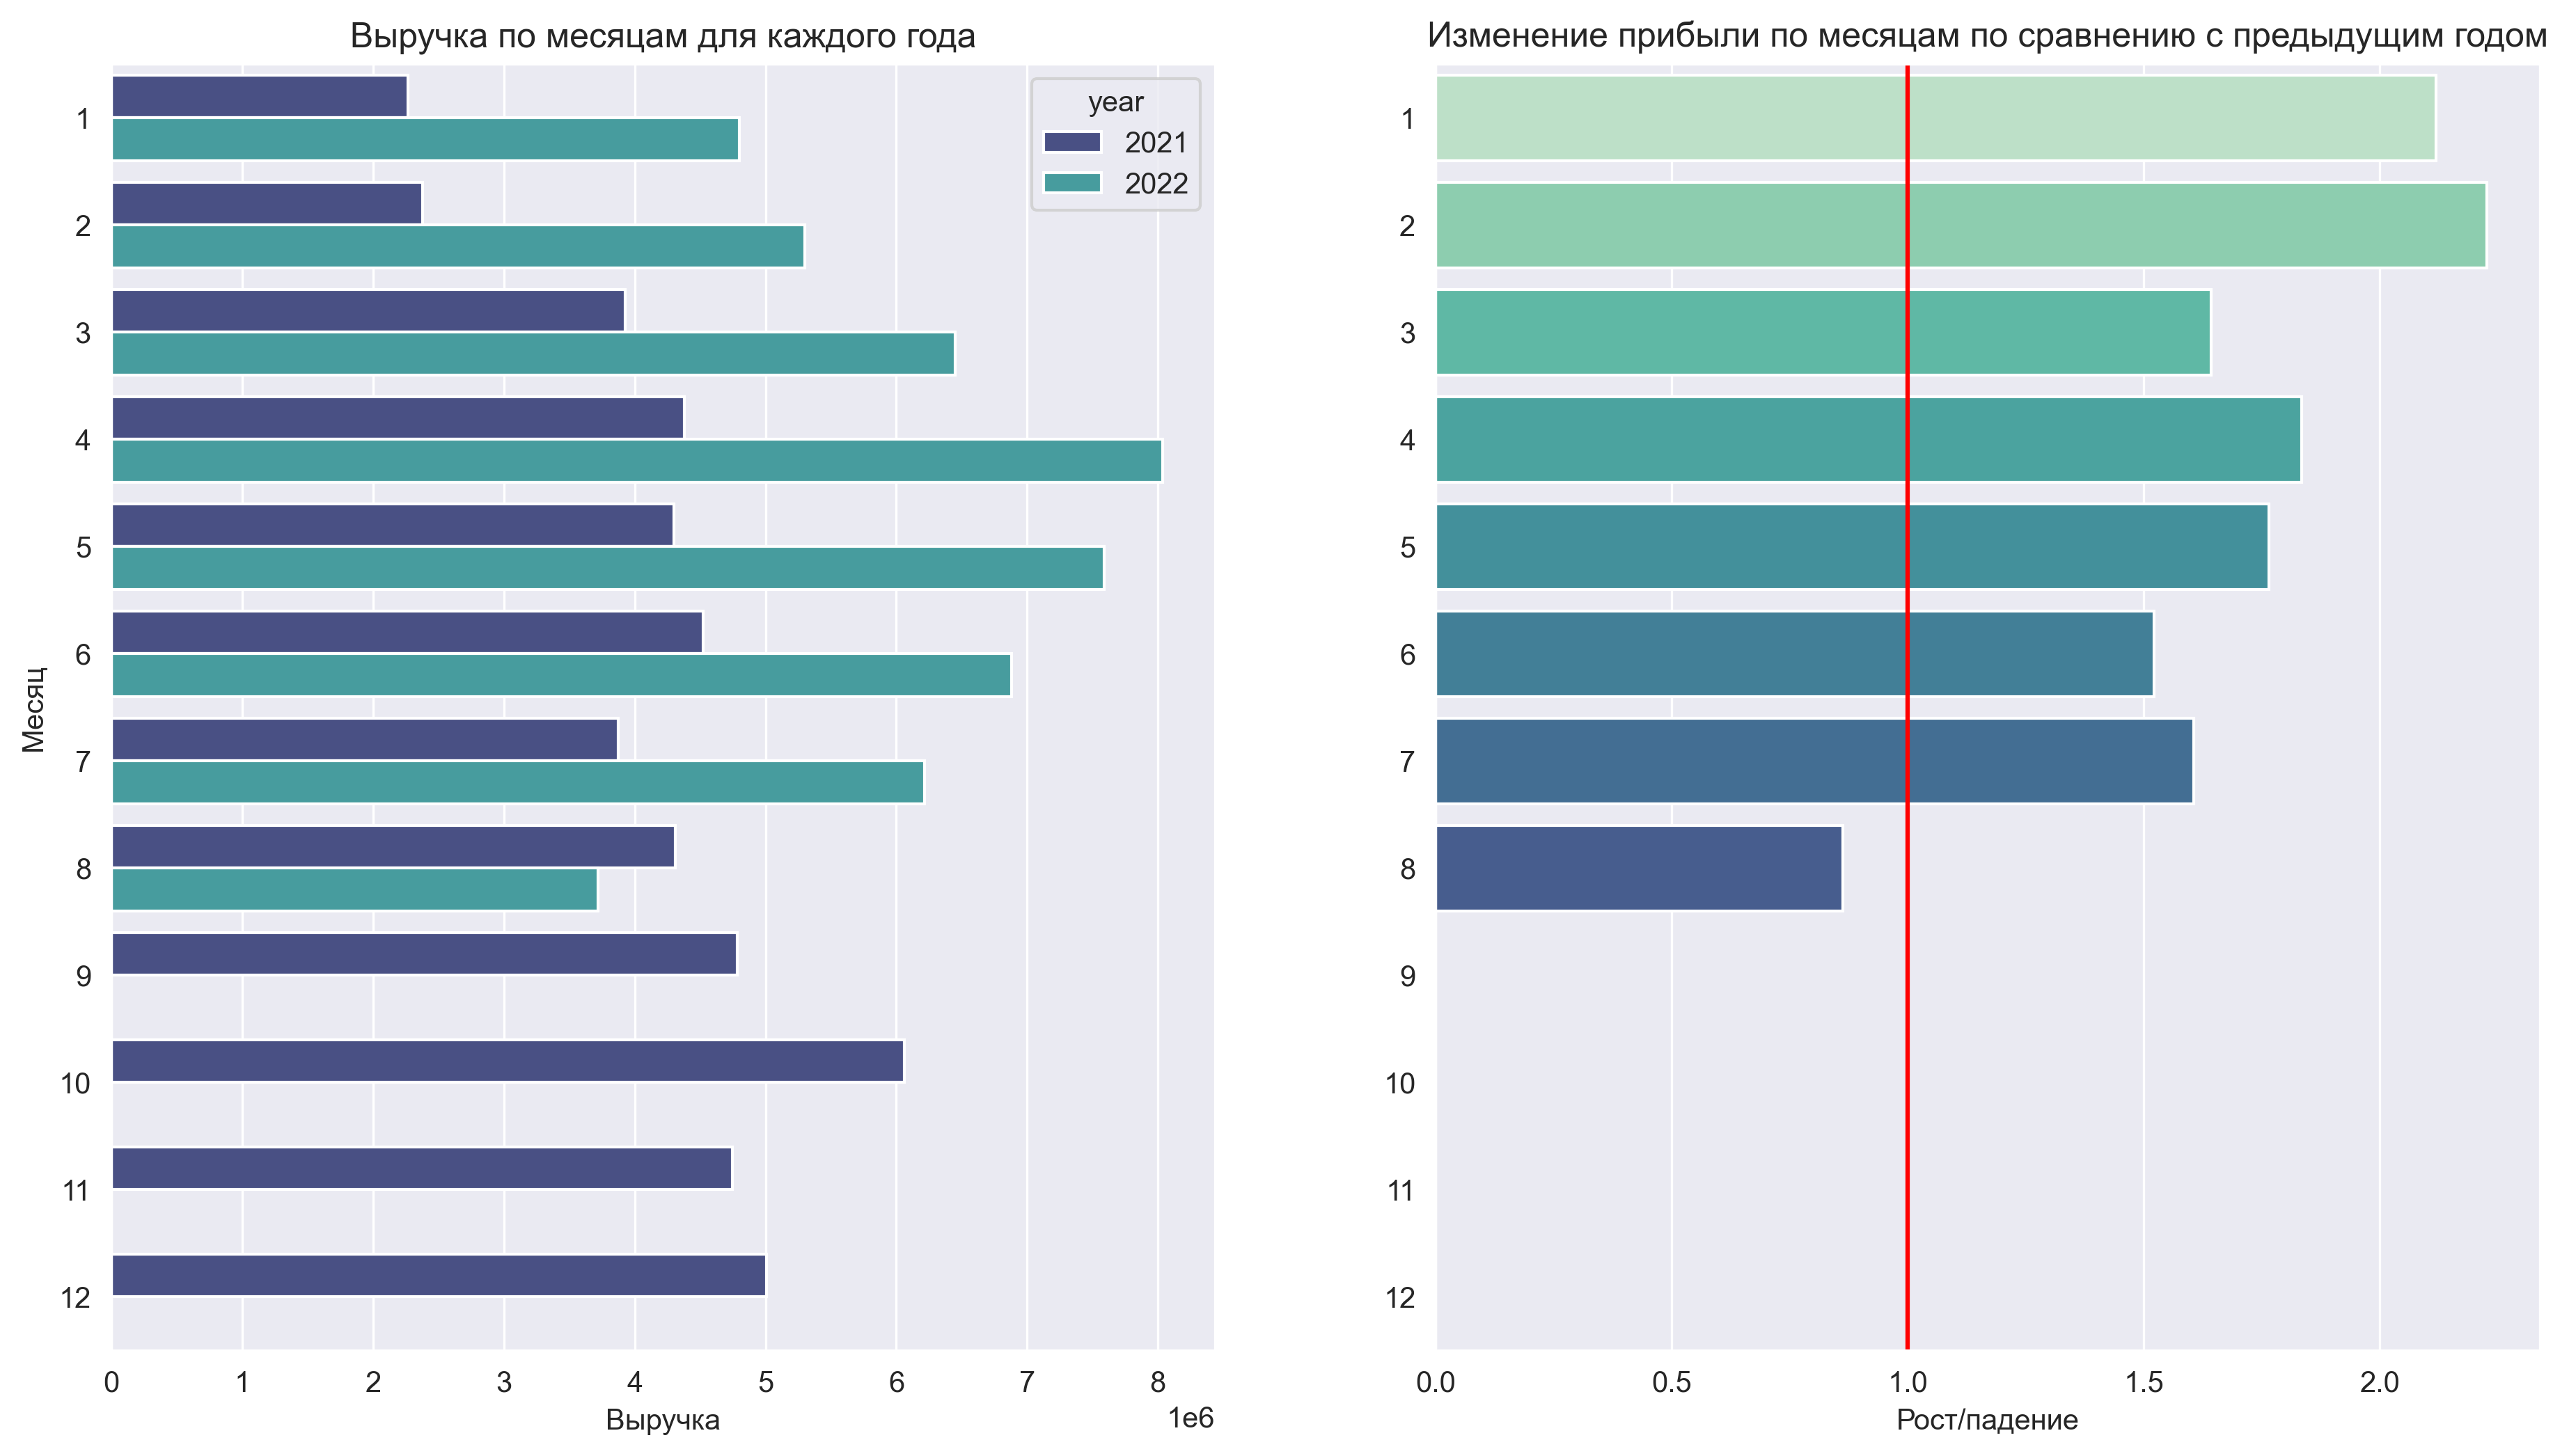

In [876]:
fig, ax =plt.subplots(1,2,dpi=300)
sns.barplot(data=revenue_by_month, x='service_amount', y='month', orient="h", hue='year', ax=ax[0])
ax[0].set_xlabel('Выручка')
ax[0].set_ylabel('Месяц')
ax[0].set_title('Выручка по месяцам для каждого года')
sns.barplot(data=merged_revenue, x='diff', y='month', orient='h', ax=ax[1], palette=np.array(pal[::-1]))
ax[1].axvline(x = 1, ymin = 0, ymax = 1, color = "red") 
ax[1].set_xlabel('Рост/падение')
ax[1].set_ylabel('')
ax[1].set_title('Изменение прибыли по месяцам по сравнению с предыдущим годом')
fig.set_figwidth(15)
fig.set_figheight(8)

Сравнивая прибыль по месяцам между 2021 и 2022 годами, можно заметить, что доход был выше в 2022 году на протяжении всего времени за исключением августа.

In [877]:
labels = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь']
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],subplot_titles=("<b>2021<b>","<b>2022<b>"))
fig.add_trace(go.Pie(labels=labels, values=revenue_by_month_2021['service_amount'], name=''), row=1, col=1)
fig.add_trace(go.Pie(labels=labels, values=revenue_by_month_2022['service_amount'], name=''), row=1, col=2)
fig.show()

В 2021 году более прибыльной была вторая половина года, в то время как в 2022 году - первая половина. 

    month  service_amount
5       6    10396.747126
9      10    10259.864636
3       4     9380.057816
4       5     9166.264392
11     12     8947.053571
7       8     8833.993852
10     11     8807.662338
2       3     8805.488789
6       7     8662.659955
8       9     8556.098390
0       1     7922.835664
1       2     7699.433657


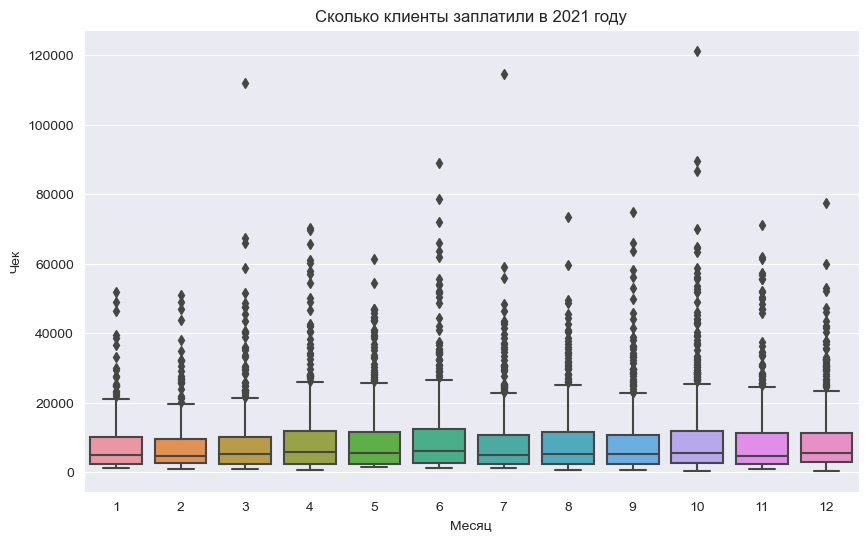

In [878]:
# calculate check per month
tmp_2021 = df.query('year==2021')
amount_by_client = create_pivot(tmp_2021, 'service_amount', ['month', 'insured'], 'sum').reset_index()
amount_by_client_ = create_pivot(amount_by_client,'service_amount', 'month', 'mean').reset_index().sort_values(by='service_amount', ascending=False)
print(amount_by_client_)
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(10)
ax = sns.boxplot(x='month', y='service_amount', data=amount_by_client)
ax.set_xlabel('Месяц')
ax.set_ylabel('Чек')
ax.set_title('Сколько клиенты заплатили в 2021 году')
plt.show()

   month  service_amount
7      8    10355.930362
3      4    10119.748111
2      3     9744.803625
6      7     9698.124805
4      5     9461.483791
5      6     9321.924119
1      2     8995.305603
0      1     8649.225225


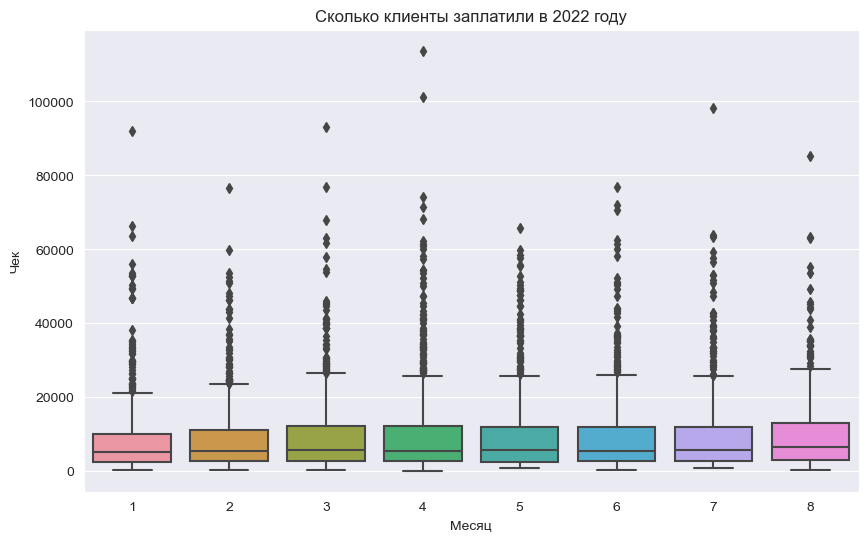

In [879]:
tmp_2022 = df.query('year==2022')
amount_by_client = create_pivot(tmp_2022, 'service_amount', ['month', 'insured'], 'sum').reset_index()
amount_by_client_ = create_pivot(amount_by_client,'service_amount', 'month', 'mean').reset_index().sort_values(by='service_amount', ascending=False)
print(amount_by_client_)
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(10)
ax = sns.boxplot(x='month', y='service_amount', data=amount_by_client)
ax.set_xlabel('Месяц')
ax.set_ylabel('Чек')
ax.set_title('Сколько клиенты заплатили в 2022 году')
plt.show()

Средний чек на клиента за визит в 2022 году чуть выше, чем в 2021.

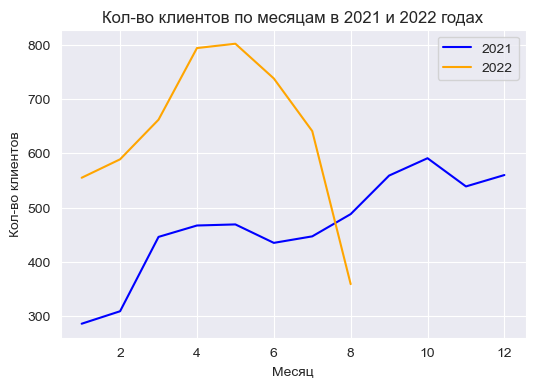

In [880]:
clients_2021 = create_pivot(tmp_2021, 'insured', 'month', lambda x: len(x.unique())).reset_index()
clients_2022 = create_pivot(tmp_2022, 'insured', 'month', lambda x: len(x.unique())).reset_index()

fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(6)
sns.lineplot(x='month', y='insured', data=clients_2021, hue=2021, palette=['blue'])
sns.lineplot(x='month', y='insured', data=clients_2022, hue=2022, palette=['orange'])
ax.set_xlabel('Месяц')
ax.set_ylabel('Кол-во клиентов')
ax.set_title('Кол-во клиентов по месяцам в 2021 и 2022 годах')
plt.show()

В 2021 году можно заметить постепенный рост клиентов на протяжении всего года с некоторыми понижениями, которые, скорее всего, обусловлены сезонностью. В 2022 году был рост до мая и затем резкий спад.

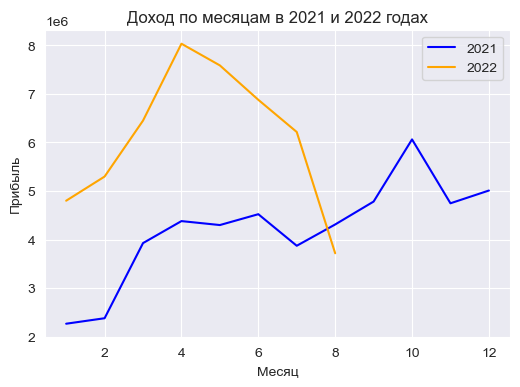

In [881]:
rev_2021 = create_pivot(tmp_2021, 'service_amount', 'month', 'sum').reset_index()
rev_2022 = create_pivot(tmp_2022, 'service_amount', 'month', 'sum').reset_index()

fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(6)
sns.lineplot(x='month', y='service_amount', data=rev_2021, hue=2021, palette=['blue'])
sns.lineplot(x='month', y='service_amount', data=rev_2022, hue=2022, palette=['orange'])
ax.set_xlabel('Месяц')
ax.set_ylabel('Прибыль')
ax.set_title('Доход по месяцам в 2021 и 2022 годах')
plt.show()

Можно заметить взаимоотношение между общим доходом и числом клиентов. Как только посетителей стало меньше, выручка просела.

**Гипотеза 1:** 
Средняя стоимость обслуживания изменилась из-за изменения числа клиентов.

In [882]:
def plot_pointplot(df1,df2,x_,y_, hue_,xlbl,ylbl,ttl,pltt):
    sns.pointplot(data=df1, x=x_, y=y_, hue=hue_, ax=ax[0],palette=pltt)
    ax[0].set_xlabel(xlbl)
    ax[0].set_ylabel(ylbl)
    ax[0].set_title(ttl + ' в 2021')
    sns.pointplot(data=df2, x=x_, y=y_, hue=hue_, ax=ax[1],palette=pltt)
    ax[1].set_xlabel(xlbl)
    ax[1].set_ylabel('')
    ax[1].set_title(ttl + ' в 2022')

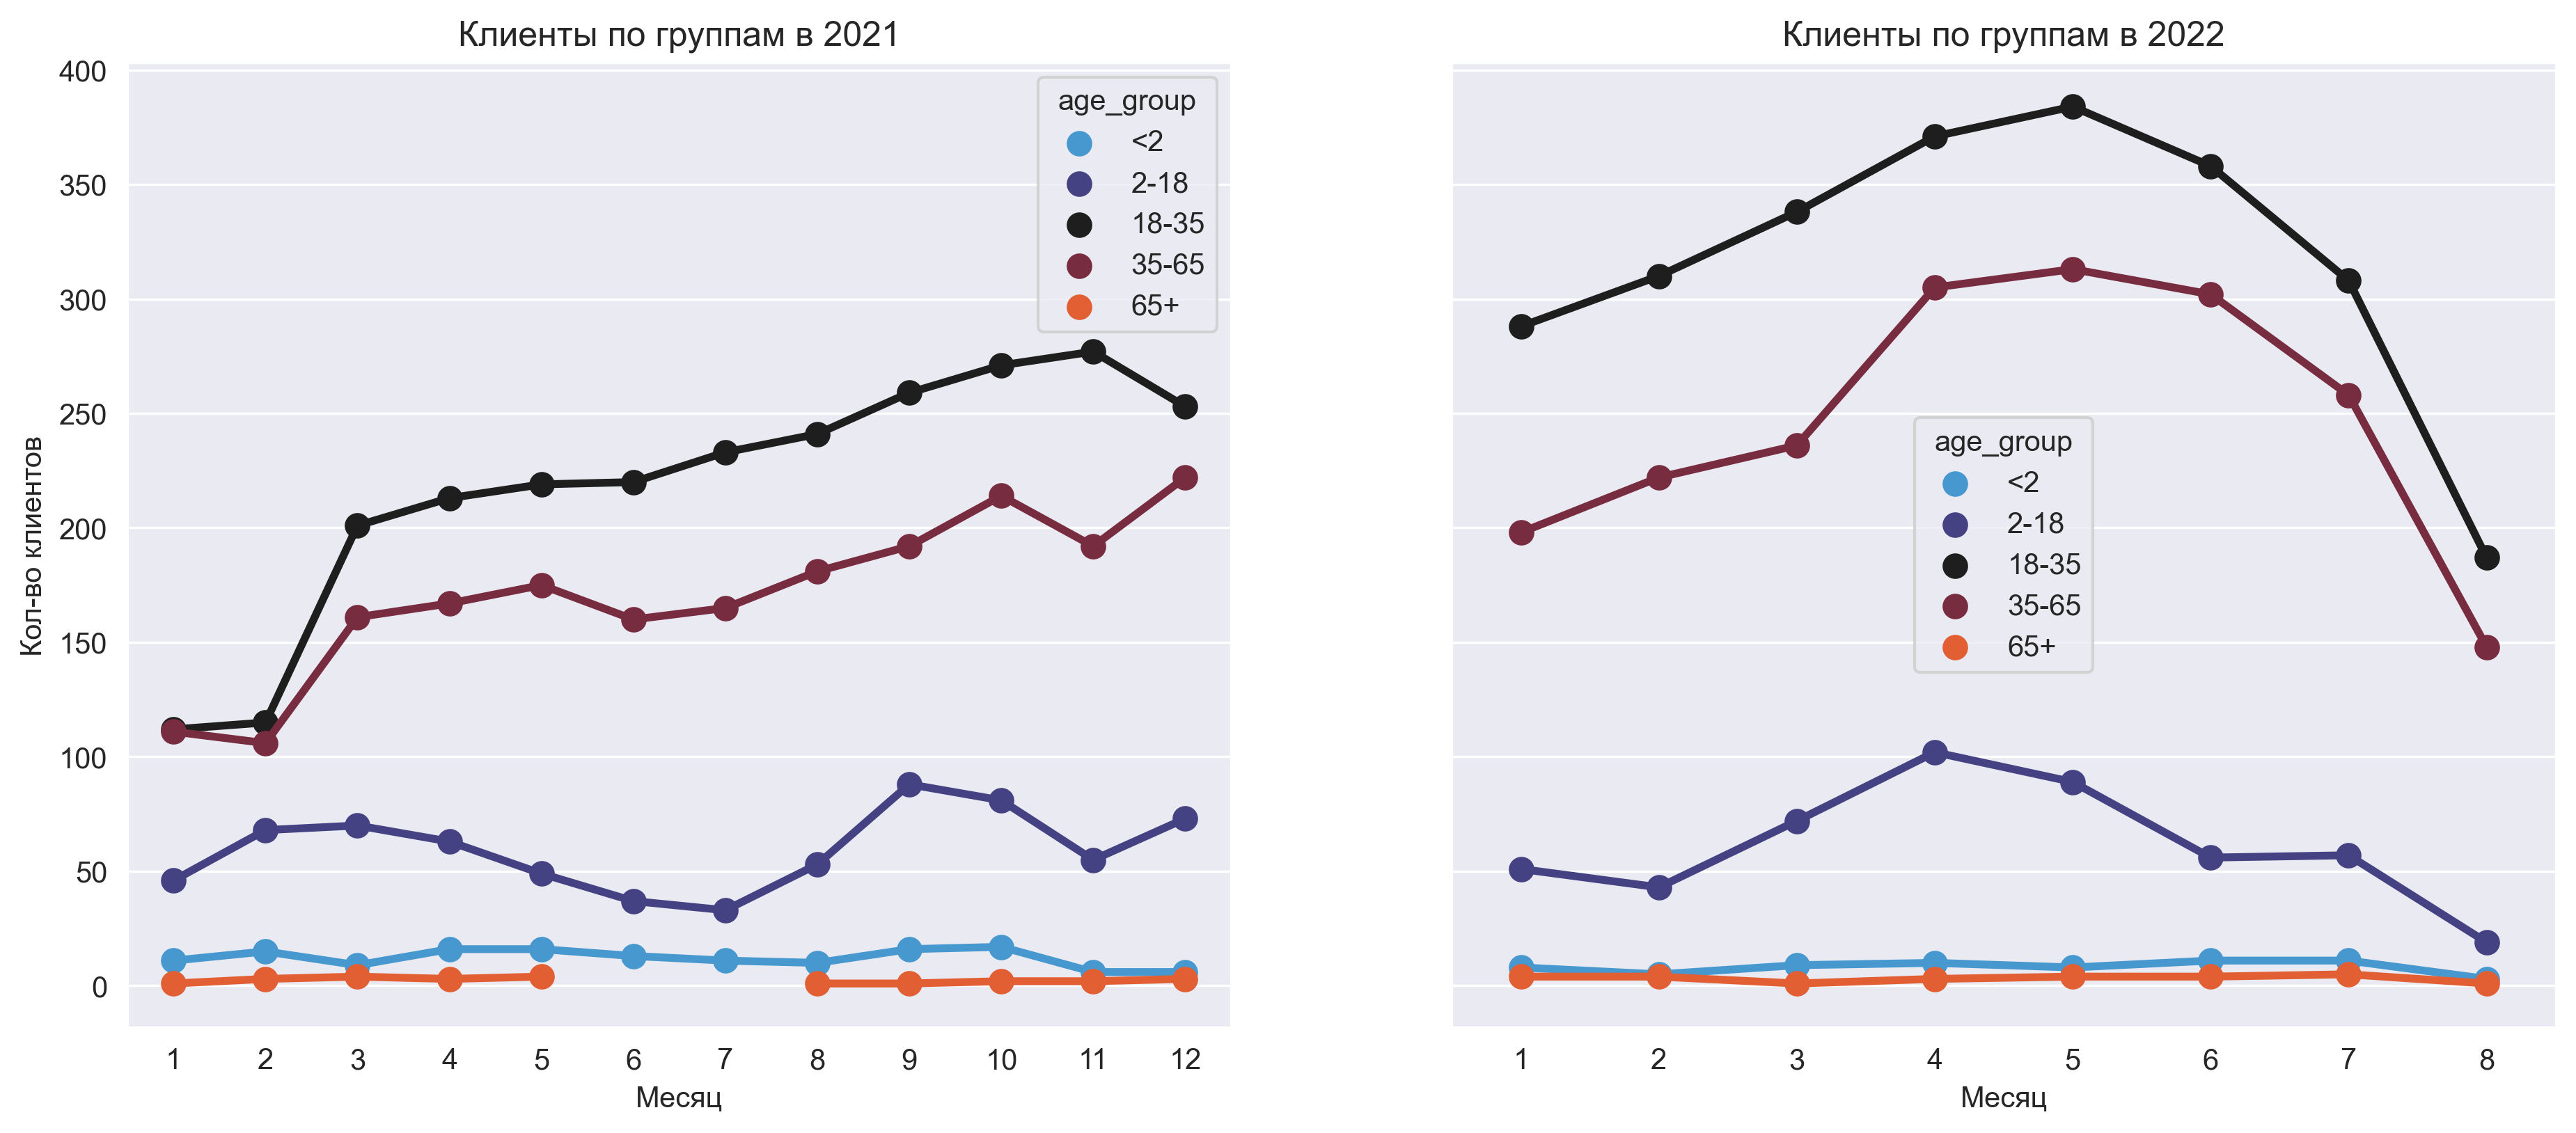

In [883]:
clients_2021 = create_pivot(tmp_2021, 'insured', ['month', 'age_group'], lambda x: len(x.unique())).reset_index()
clients_2022 = create_pivot(tmp_2022, 'insured', ['month', 'age_group'], lambda x: len(x.unique())).reset_index()

fig, ax =plt.subplots(1,2,dpi=300,sharey=True)
plot_pointplot(clients_2021,clients_2022,'month','insured','age_group','Месяц','Кол-во клиентов','Клиенты по группам','icefire')
fig.set_figwidth(15)
fig.set_figheight(6)

Основная часть клиентов - это люди от 18 до 65 лет.

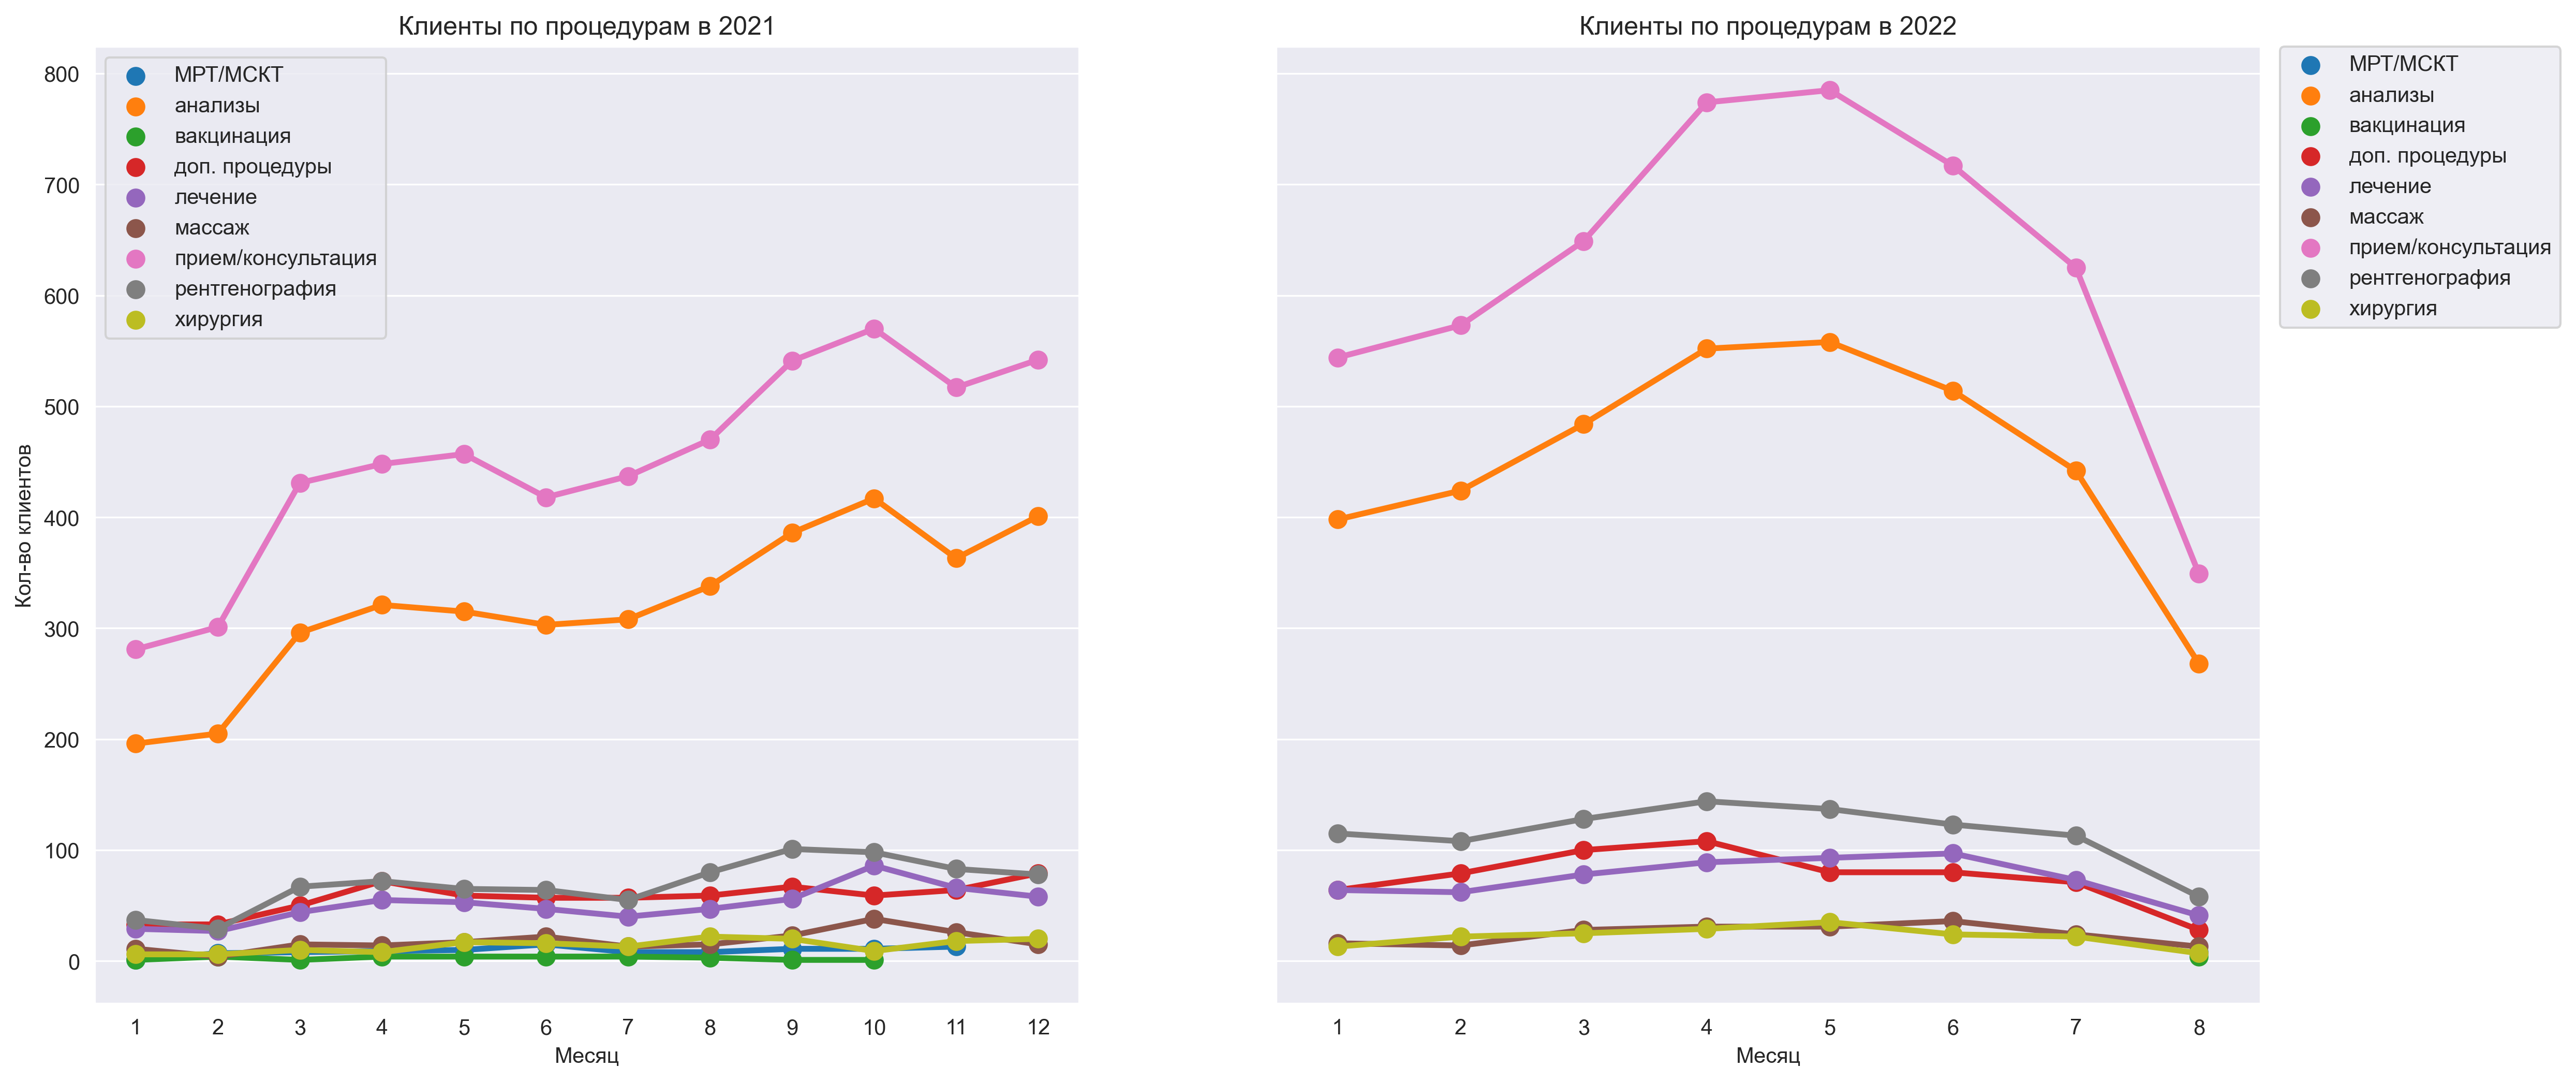

In [884]:
by_category_2021 = create_pivot(tmp_2021, 'insured', ['month', 'category'], lambda x: len(x.unique())).reset_index().sort_values(by='category')
by_category_2022 = create_pivot(tmp_2022, 'insured', ['month', 'category'], lambda x: len(x.unique())).reset_index().sort_values(by='category')

fig, ax =plt.subplots(1,2,dpi=300,sharey=True)
plot_pointplot(by_category_2021,by_category_2022,'month','insured','category','Месяц','Кол-во клиентов','Клиенты по процедурам','tab10')
ax[0].legend(loc='upper left')
ax[1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
fig.set_figwidth(18)
fig.set_figheight(8)

В 2022 году можно заметить снижение спроса на все виды услуг начиная примерно с апреля-мая.

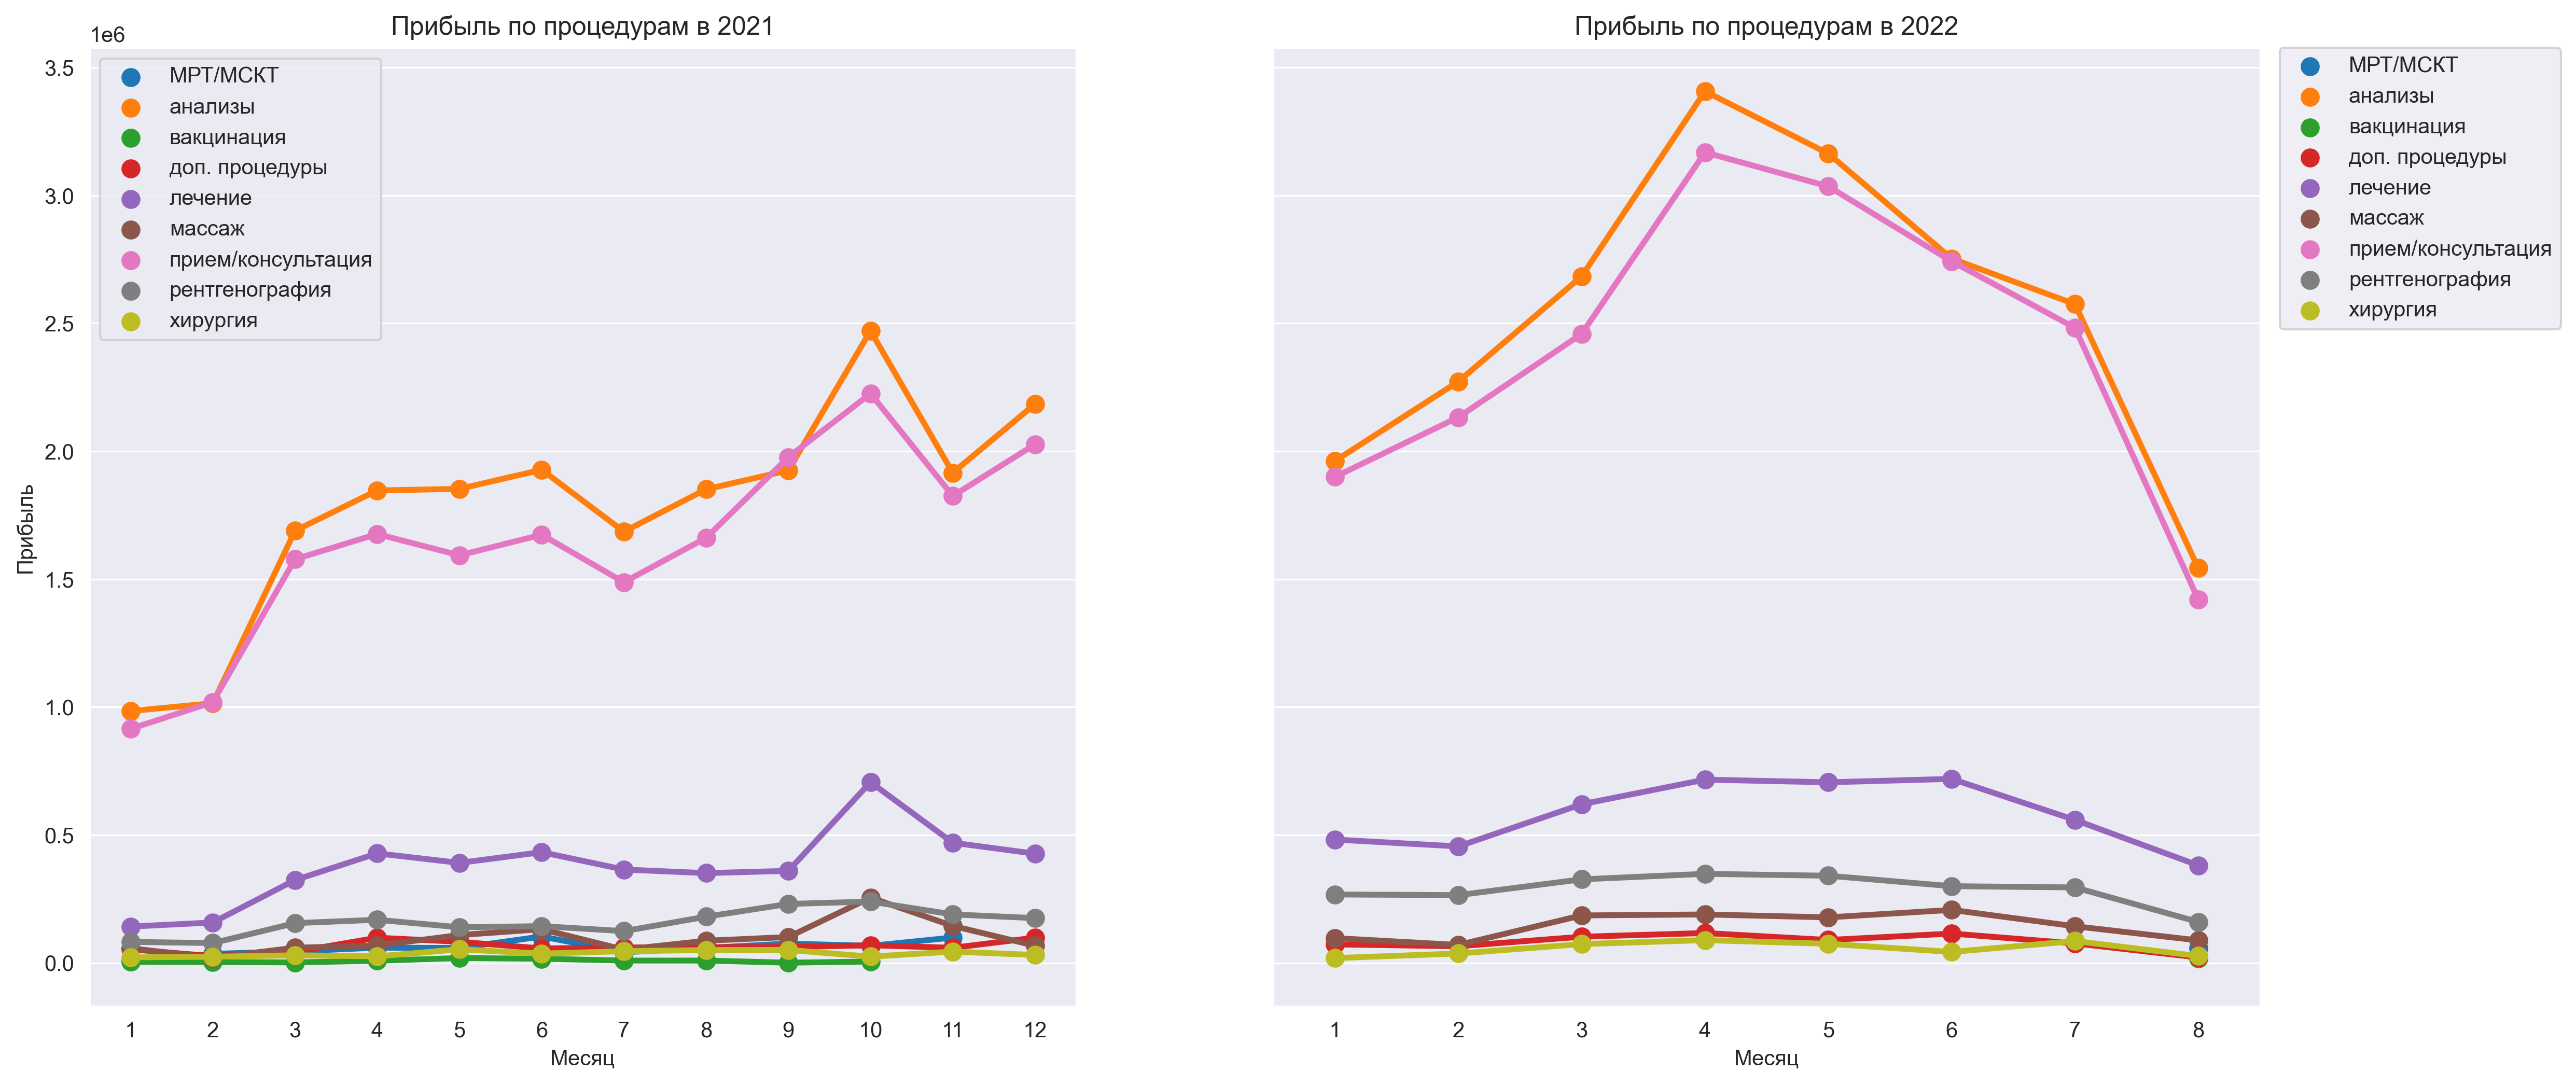

In [885]:
by_category_2021 = create_pivot(tmp_2021, 'service_amount', ['month', 'category'], 'sum').reset_index().sort_values(by='category')
by_category_2022 = create_pivot(tmp_2022, 'service_amount', ['month', 'category'], 'sum').reset_index().sort_values(by='category')

fig, ax =plt.subplots(1,2,dpi=300,sharey=True)
plot_pointplot(by_category_2021,by_category_2022,'month','service_amount','category','Месяц','Прибыль','Прибыль по процедурам','tab10')
ax[0].legend(loc='upper left')
ax[1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
fig.set_figwidth(18)
fig.set_figheight(8)

В 2022 году прибыль по приему и анализам начала стремительно падать начиная с апреля.

**Вывод:** 
Отток клиентов возможно вызван увеличением цен.

**Гипотеза 2**: 
Средняя стоимость обслуживания изменилась из-за изменения цен на услуги.

In [886]:
avrg_by_category_2021 = create_pivot(tmp_2021, 'service_amount', 'service_name', 'mean').reset_index().sort_values(by='service_amount', ascending=False)
avrg_by_category_2022 = create_pivot(tmp_2022, 'service_amount', 'service_name', 'mean').reset_index().sort_values(by='service_amount', ascending=False)
avrg_by_category_2021 = pd.merge(avrg_by_category_2021, avrg_by_category_2022[['service_amount', 'service_name']], on='service_name', how='inner')
avrg_by_category_2021 = avrg_by_category_2021.rename(columns={'service_amount_x':'amount_2021','service_amount_y':'amount_2022'})
avrg_by_category_2021.head(15)

,service_name,amount_2021,amount_2022
0,Хирургическое удаление доброкачественной опухо...,7857.500000,8312.500000
1,Вскрытие панариция,7665.000000,8137.500000
2,Электронейромиография - игольчатая миография в...,7560.000000,3975.000000
3,МРТ плечевого сустава,7473.333333,7720.000000
4,Вскрытие абсцесса различной локализации,7016.818182,6804.000000
5,Вскрытие карбункула,6620.000000,6620.000000
6,Удаление атеромы,6615.000000,6950.000000
7,Удаление вросшего ногтя,6353.333333,6950.000000
8,Колоноскопия с забором биопсии,6286.400000,6614.444444
9,МРТ коленного сустава,6243.157895,9750.000000


**Вывод:** 
Из выше перечисленной таблицы можно заметить, что цены на большинство услуг повысились, что подтверждает нашу гипотезу.

**Гипотеза 3**: 
Средняя стоимость обслуживания изменилась из-за изменения количества оказанных услуг.

In [887]:
services = ['МРТ/МСКТ', 'лечение', 'вакцинация', 'хирургия', 'массаж', 'рентгенография', 'прием/консультация', 'доп. процедуры', 'анализы']
for i in services:
    list_1 = tmp_2021[tmp_2021['category']==i]['service_name']
    list_2 = tmp_2022[tmp_2022['category']==i]['service_name']
    tmp = len(list_1.unique()) - len(list_2.unique())
    string = 'Кол-во услуг для категории ' + i
    if tmp > 0:
        string = string + ' уменьшилось на '
        print(string, abs(tmp))
    elif tmp < 0:
        string = string + ' выросло на '
        print(string, abs(tmp))
    else: 
        string = string + ' осталось прежним '
        print(string)

Кол-во услуг для категории МРТ/МСКТ уменьшилось на  19
Кол-во услуг для категории лечение выросло на  3
Кол-во услуг для категории вакцинация уменьшилось на  5
Кол-во услуг для категории хирургия уменьшилось на  3
Кол-во услуг для категории массаж осталось прежним 
Кол-во услуг для категории рентгенография выросло на  14
Кол-во услуг для категории прием/консультация выросло на  5
Кол-во услуг для категории доп. процедуры выросло на  3
Кол-во услуг для категории анализы уменьшилось на  50


**Вывод:** 
Результат неоднозначный, т.к. для некоторых категорий увеличилось количество услуг.

## Общий вывод

- В 2021 году были сняты ковидные ограничения, чем можно объяснить постепенный рост клиентов на протяжении всего следующего года. Клиника была замотивирована привлечением клиентов. 

- Т.к. начиная с конца февраля 2022 курс рубля резко упал, скорое увеличение стоимости на товары и услуги было очевидным. В связи с тем, что лабораторное и медицинское оборудование в основном производится за рубежом, клиникам необходимо было поднять цены, чтобы справиться с закупками расходных материалов. В данном случае клиенты сами старались успеть пройти все процедуры до значительного повышения цен. 

- Как было сказано ранее, основная часть клиентов - это люди от 18 до 65 лет. Кроме того, это самая платежеспособная прослойка населения. В 2022 году был замечен высокий рейтинг эмиграции, чем можно объяснить отток клиентов с апреля 2022.